In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_cleaned = pd.read_csv('data/data_cleaned.csv')
data_cleaned['Start Date'] = pd.to_datetime(data_cleaned['Start Date'], errors='coerce')
data_cleaned['End Date'] = pd.to_datetime(data_cleaned['End Date'], errors='coerce')
data_cleaned['Transaction Date (Pacific Time)'] = pd.to_datetime(data_cleaned['Transaction Date (Pacific Time)'], errors='coerce')
data_cleaned['Total Duration (hh:mm:ss)'] = pd.to_timedelta(data_cleaned['Total Duration (hh:mm:ss)'])
data_cleaned['Charging Time (hh:mm:ss)'] = pd.to_timedelta(data_cleaned['Charging Time (hh:mm:ss)'])
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169443 entries, 0 to 169442
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype          
---  ------                           --------------   -----          
 0   Station Name                     169443 non-null  object         
 1   MAC Address                      169443 non-null  object         
 2   Org Name                         169443 non-null  object         
 3   Start Date                       169443 non-null  datetime64[ns] 
 4   Start Time Zone                  169443 non-null  object         
 5   End Date                         169405 non-null  datetime64[ns] 
 6   End Time Zone                    169443 non-null  object         
 7   Transaction Date (Pacific Time)  169405 non-null  datetime64[ns] 
 8   Total Duration (hh:mm:ss)        169443 non-null  timedelta64[ns]
 9   Charging Time (hh:mm:ss)         169443 non-null  timedelta64[ns]
 10  Energy (kWh)                    

In [4]:
data_cleaned

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 05:21:00,PDT,2016-08-01 06:49:00,PDT,2016-08-01 06:49:00,0 days 01:27:58,0 days 01:25:26,...,-122.146065,USD,0.00,Plug Out at Vehicle,1665,94587.0,523487.0,Santa Clara County,1.427410e+11,CT4020-HD-GW
1,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,2016-08-01 06:01:00,PDT,2016-08-01 10:58:00,PDT,2016-08-01 10:58:00,0 days 04:56:27,0 days 02:31:04,...,-122.146065,USD,0.00,Plug Out at Vehicle,1771,95030.0,141845.0,Santa Clara County,1.428410e+11,CT4020-HD-GW
2,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 06:03:00,PDT,2016-08-01 09:15:00,PDT,2016-08-01 09:15:00,0 days 03:12:17,0 days 03:11:18,...,-122.146065,USD,0.00,Plug Out at Vehicle,1666,80525.0,203603.0,Santa Clara County,1.427410e+11,CT4020-HD-GW
3,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,2016-08-01 06:10:00,PDT,2016-08-01 08:54:00,PDT,2016-08-01 08:54:00,0 days 02:44:25,0 days 02:25:49,...,-122.159904,USD,0.00,Plug Out at Vehicle,2093,94539.0,126575.0,Santa Clara County,1.427410e+11,CT4020-HD-GW
4,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,2016-08-01 06:13:00,PDT,2016-08-01 09:33:00,PDT,2016-08-01 09:33:00,0 days 03:19:24,0 days 03:19:15,...,-122.162849,USD,0.00,Plug Out at Vehicle,3112,94024.0,191743.0,Santa Clara County,1.422410e+11,CT4020-HD-GW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169438,PALO ALTO CA / CAMBRIDGE #5,0024:B100:0002:9B7F,City of Palo Alto,2020-12-31 15:51:00,PST,2020-12-31 17:30:00,PST,2020-12-31 17:31:00,0 days 01:38:27,0 days 01:21:36,...,-122.145981,USD,0.58,Plug Out at Vehicle,4672,94303.0,2652881.0,Santa Clara County,1.742410e+11,CT4020-HD
169439,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,2020-12-31 20:32:00,0 days 03:43:01,0 days 02:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661.0,Santa Clara County,1.336410e+11,CT4020-HD-GW
169440,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,2021-01-01 10:57:00,0 days 17:28:14,0 days 05:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995.0,Santa Clara County,2.002410e+11,CT4010-HD-GW
169441,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 17:49:00,PST,2020-12-31 21:55:00,PST,2020-12-31 21:56:00,0 days 04:05:34,0 days 03:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075.0,Santa Clara County,1.336410e+11,CT4020-HD-GW


[1] https://www.cityofpaloalto.org/City-Hall/Sustainability/Electric-Vehicles

## 1) Electric Vehicle STORY OF ONE CITY (PALO ALTO)

Palo Alto is located in the center of Silicon Valley, and has one of the highest EV adoption rates per capita, with **2500** residents currently owning EVs and another **1,000 EV** commuters coming into town each day. The city has taken multiple actions to accelerate EV adoption [1].

### Key Factors in Palo Alto's Success:

- City and state-level incentives that lower the cost of EVs up to **80,000 $**
- Solid charging network in the city center near large employers such as **Stanford, University South, and Tesla Motors.**
- A tech-savvy population 
- "Ride and drive" events to introduce residents to EVs, with a significant percentage of participants experiencing their first EV test drive.

### Our aim for further improvements
- Create a forecasting model to understand when there is largest amount of people charging
- Understand EV energy spending 
- Understand electricity generation in the city to further incentivise sustainability

#### A) Data Analysis

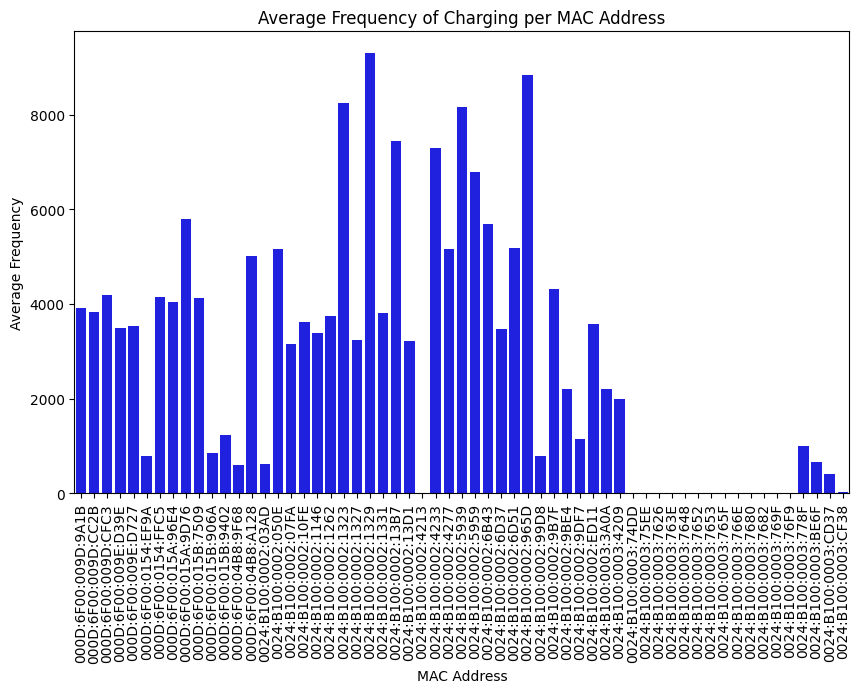

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average frequency of charging per MAC Address
average_frequency = data_cleaned.groupby('MAC Address').size()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar chart of the average frequencies
sns.barplot(x=average_frequency.index, y=average_frequency.values, color='blue')

plt.title('Average Frequency of Charging per MAC Address')
plt.xlabel('MAC Address')
plt.ylabel('Average Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [42]:
average_frequency

MAC Address
000D:6F00:009D:9A1B    3922
000D:6F00:009D:CC2B    3842
000D:6F00:009D:CFC3    4198
000D:6F00:009E:D39E    3497
000D:6F00:009E:D727    3526
000D:6F00:0154:EF9A     782
000D:6F00:0154:FFC5    4142
000D:6F00:015A:96E4    4033
000D:6F00:015A:9D76    5787
000D:6F00:015B:7509    4120
000D:6F00:015B:906A     855
000D:6F00:015B:9402    1228
000D:6F00:04B8:9F68     605
000D:6F00:04B8:A128    5014
0024:B100:0002:03AD     617
0024:B100:0002:050E    5164
0024:B100:0002:07FA    3161
0024:B100:0002:10FE    3615
0024:B100:0002:1146    3383
0024:B100:0002:1262    3754
0024:B100:0002:1323    8249
0024:B100:0002:1327    3237
0024:B100:0002:1329    9290
0024:B100:0002:1331    3819
0024:B100:0002:13B7    7435
0024:B100:0002:13D1    3212
0024:B100:0002:4233    7303
0024:B100:0002:4277    5172
0024:B100:0002:5939    8160
0024:B100:0002:5959    6778
0024:B100:0002:6B43    5693
0024:B100:0002:6D37    3467
0024:B100:0002:6D51    5182
0024:B100:0002:965D    8829
0024:B100:0002:99D8     782
0024:B10

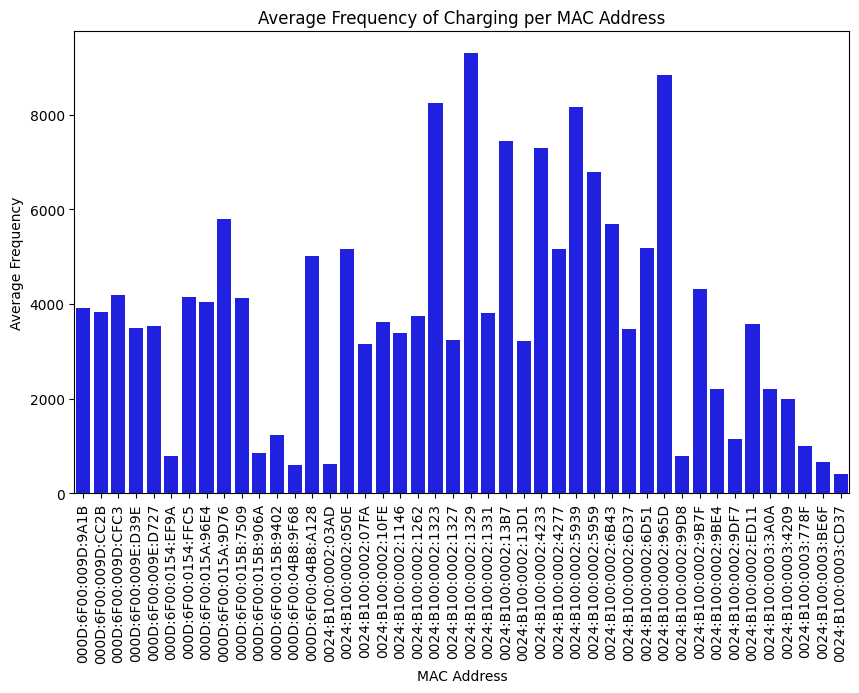

In [43]:
# Calculate the average frequency of charging per MAC Address
average_frequency = data_cleaned.groupby('MAC Address').size()

# Remove the stations with frequency = 0
average_frequency = average_frequency[average_frequency > 28]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar chart of the average frequencies
sns.barplot(x=average_frequency.index, y=average_frequency.values, color='blue')

plt.title('Average Frequency of Charging per MAC Address')
plt.xlabel('MAC Address')
plt.ylabel('Average Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

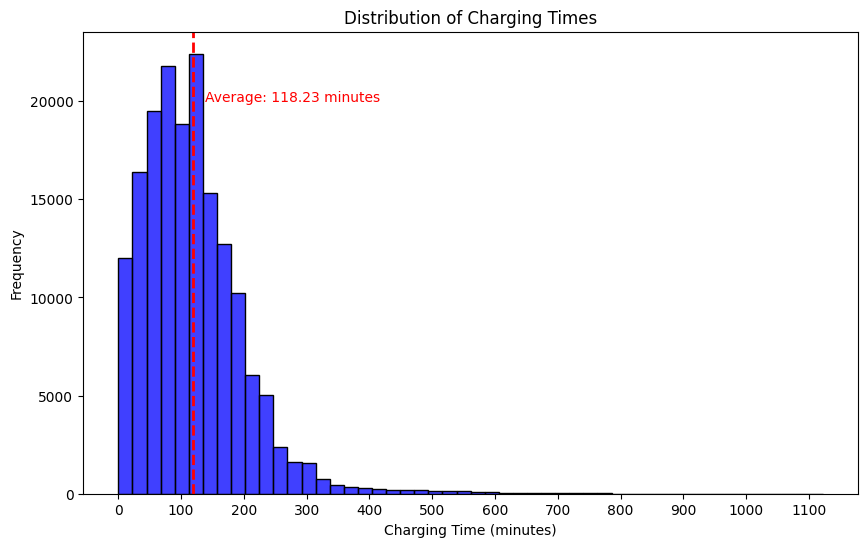

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data_cleaned = data_cleaned[data_cleaned['MAC Address'].isin(average_frequency.index)]
charging_time_minutes = data_cleaned['Charging Time (hh:mm:ss)'].dt.total_seconds() / 60

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram of charging times
sns.histplot(charging_time_minutes, bins=50, color='blue')

# Calculate the average charging time
average_charging_time = charging_time_minutes.mean()

# Add a vertical line at the average charging time
plt.axvline(average_charging_time, color='red', linestyle='dashed', linewidth=2)

# Print the average charging time on the plot
plt.text(average_charging_time+20, 20000, 'Average: {:.2f} minutes'.format(average_charging_time), color='red')

# Set the x-axis ticks
plt.xticks(np.arange(0, charging_time_minutes.max(), 100))

plt.title('Distribution of Charging Times')
plt.xlabel('Charging Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [45]:
import numpy as np
from scipy.stats import wasserstein_distance

# Convert 'Charging Time (hh:mm:ss)' to total number of minutes
data_cleaned['Charging Time (minutes)'] = data_cleaned['Charging Time (hh:mm:ss)'].dt.total_seconds() / 60

# Get the unique MAC Addresses
mac_addresses = data_cleaned['MAC Address'].unique()

# Create a distribution for the average charging time
average_distribution = data_cleaned['Charging Time (minutes)']

# Create a dictionary to store the values
values_dict = {}

# Loop over the unique MAC Addresses
for mac_address in mac_addresses:
    # Filter the data for the current MAC Address
    data_filtered = data_cleaned[data_cleaned['MAC Address'] == mac_address]
    
    # Calculate the average charging time
    average_charging_time = data_filtered['Charging Time (minutes)'].mean()
    
    # Calculate the Wasserstein distance between the distribution for the current MAC Address and the average distribution
    w_dist = wasserstein_distance(data_filtered['Charging Time (minutes)'], average_distribution)
    
    # Save the values into the dictionary
    values_dict[mac_address] = (average_charging_time, w_dist)

# Find the MAC Address with the most similar distribution (minimum Wasserstein distance)
most_similar_mac_address = min(values_dict, key=lambda x: values_dict[x][1])

# Find the MAC Address with the most distant distribution (maximum Wasserstein distance)
most_distant_mac_address = max(values_dict, key=lambda x: values_dict[x][1])

# Sort the dictionary by the Wasserstein distance
sorted_values = sorted(values_dict.items(), key=lambda x: x[1][1])

# Find the MAC Address with the median Wasserstein distance
median_mac_address = sorted_values[len(sorted_values) // 2][0]

print('Median Distribution: MAC Address: {}, Average Charging Time: {:.2f} minutes, Wasserstein Distance to Average Distribution: {:.2f}'.format(median_mac_address, *values_dict[median_mac_address]))
print('Most Similar Distribution: MAC Address: {}, Average Charging Time: {:.2f} minutes, Wasserstein Distance to Average Distribution: {:.2f}'.format(most_similar_mac_address, *values_dict[most_similar_mac_address]))
print('Most Distant Distribution: MAC Address: {}, Average Charging Time: {:.2f} minutes, Wasserstein Distance to Average Distribution: {:.2f}'.format(most_distant_mac_address, *values_dict[most_distant_mac_address]))

Median Distribution: MAC Address: 0024:B100:0002:03AD, Average Charging Time: 108.70 minutes, Wasserstein Distance to Average Distribution: 9.72
Most Similar Distribution: MAC Address: 0024:B100:0002:5959, Average Charging Time: 115.87 minutes, Wasserstein Distance to Average Distribution: 3.22
Most Distant Distribution: MAC Address: 0024:B100:0003:3A0A, Average Charging Time: 90.33 minutes, Wasserstein Distance to Average Distribution: 27.90


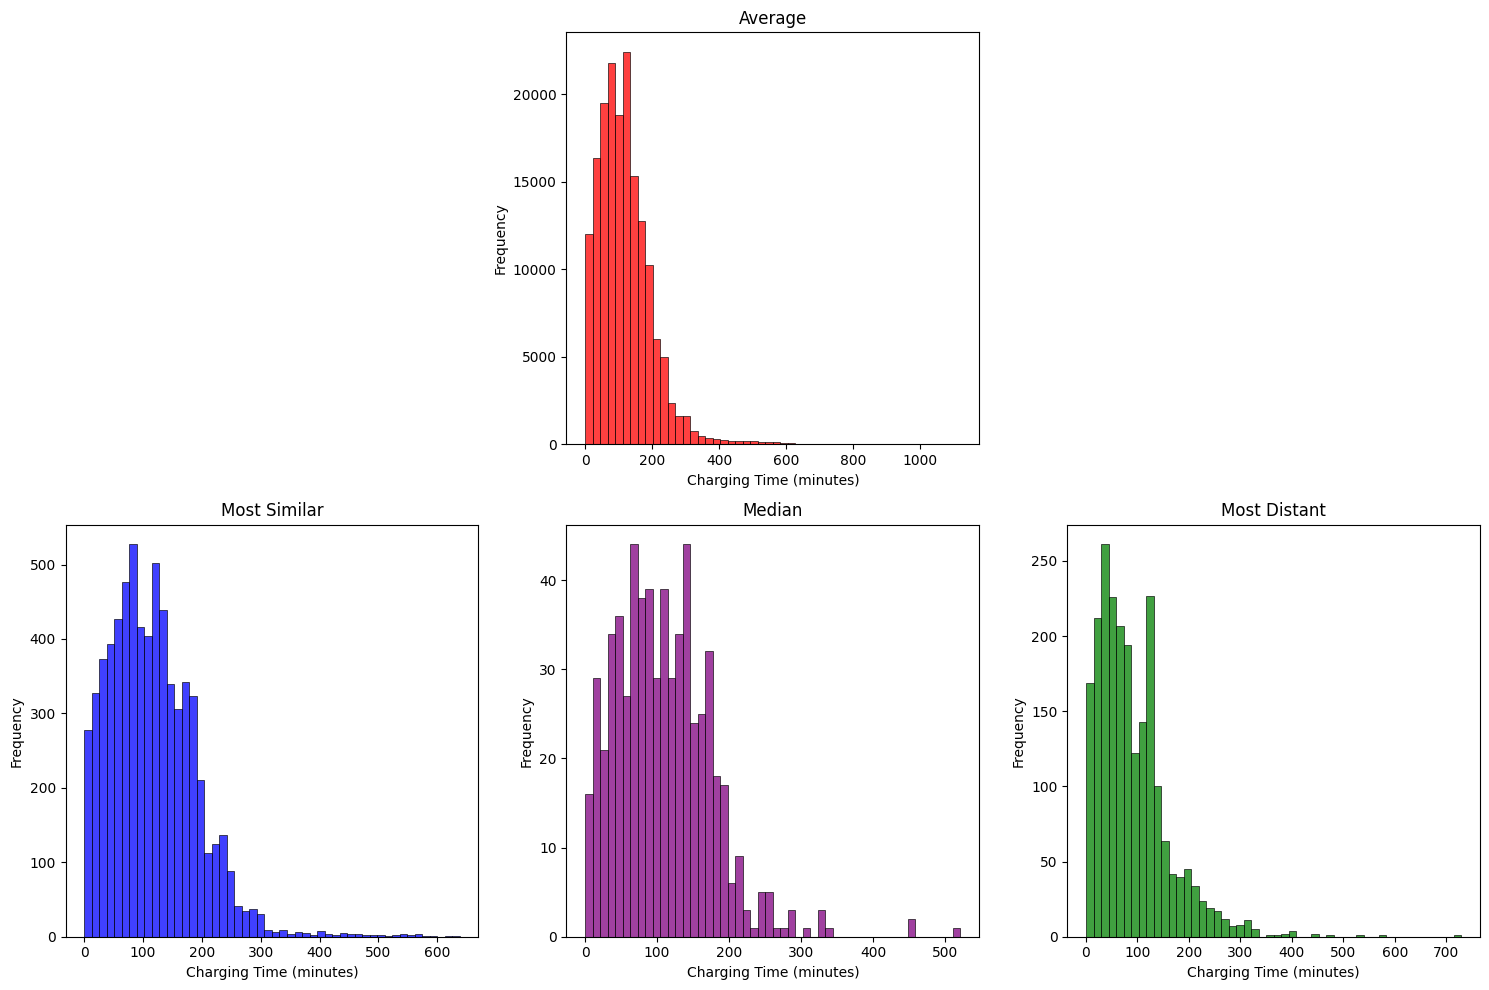

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for the most similar MAC Address
data_similar = data_cleaned[data_cleaned['MAC Address'] == most_similar_mac_address]

# Filter the data for the most distant MAC Address
data_distant = data_cleaned[data_cleaned['MAC Address'] == most_distant_mac_address]

# Filter the data for the median MAC Address
data_median = data_cleaned[data_cleaned['MAC Address'] == median_mac_address]

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a histogram of charging times for the average distribution
plt.subplot(2, 3, 2)
sns.histplot(average_distribution, bins=50, color='red')
plt.title('Average')
plt.xlabel('Charging Time (minutes)')
plt.ylabel('Frequency')

# Create a histogram of charging times for the most similar MAC Address
plt.subplot(2, 3, 4)
sns.histplot(data_similar['Charging Time (minutes)'], bins=50, color='blue')
plt.title('Most Similar')
plt.xlabel('Charging Time (minutes)')
plt.ylabel('Frequency')

# Create a histogram of charging times for the median MAC Address
plt.subplot(2, 3, 5)
sns.histplot(data_median['Charging Time (minutes)'], bins=50, color='purple')
plt.title('Median')
plt.xlabel('Charging Time (minutes)')
plt.ylabel('Frequency')

# Create a histogram of charging times for the most distant MAC Address
plt.subplot(2, 3, 6)
sns.histplot(data_distant['Charging Time (minutes)'], bins=50, color='green')
plt.title('Most Distant')
plt.xlabel('Charging Time (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [48]:
import folium

# Find unique combinations of 'MAC Address', 'Latitude', and 'Longitude'
unique_locations = data_cleaned[['MAC Address', 'Latitude', 'Longitude']].drop_duplicates()

print("Unique EV Charging locations in the city: ", len(unique_locations))

# Create a map centered at the mean latitude and longitude values
m = folium.Map(location=[data_cleaned['Latitude'].mean(), data_cleaned['Longitude'].mean()], zoom_start=13)

# Add a marker for each unique charger location
for idx, row in unique_locations.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['MAC Address']).add_to(m)

# Display the map
m

Unique EV Charging locations in the city:  49


In [7]:
data_cleaned

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 05:21:00,PDT,2016-08-01 06:49:00,PDT,2016-08-01 06:49:00,0 days 01:27:58,0 days 01:25:26,...,-122.146065,USD,0.00,Plug Out at Vehicle,1665,94587.0,523487.0,Santa Clara County,1.427410e+11,CT4020-HD-GW
1,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,2016-08-01 06:01:00,PDT,2016-08-01 10:58:00,PDT,2016-08-01 10:58:00,0 days 04:56:27,0 days 02:31:04,...,-122.146065,USD,0.00,Plug Out at Vehicle,1771,95030.0,141845.0,Santa Clara County,1.428410e+11,CT4020-HD-GW
2,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 06:03:00,PDT,2016-08-01 09:15:00,PDT,2016-08-01 09:15:00,0 days 03:12:17,0 days 03:11:18,...,-122.146065,USD,0.00,Plug Out at Vehicle,1666,80525.0,203603.0,Santa Clara County,1.427410e+11,CT4020-HD-GW
3,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,2016-08-01 06:10:00,PDT,2016-08-01 08:54:00,PDT,2016-08-01 08:54:00,0 days 02:44:25,0 days 02:25:49,...,-122.159904,USD,0.00,Plug Out at Vehicle,2093,94539.0,126575.0,Santa Clara County,1.427410e+11,CT4020-HD-GW
4,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,2016-08-01 06:13:00,PDT,2016-08-01 09:33:00,PDT,2016-08-01 09:33:00,0 days 03:19:24,0 days 03:19:15,...,-122.162849,USD,0.00,Plug Out at Vehicle,3112,94024.0,191743.0,Santa Clara County,1.422410e+11,CT4020-HD-GW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169438,PALO ALTO CA / CAMBRIDGE #5,0024:B100:0002:9B7F,City of Palo Alto,2020-12-31 15:51:00,PST,2020-12-31 17:30:00,PST,2020-12-31 17:31:00,0 days 01:38:27,0 days 01:21:36,...,-122.145981,USD,0.58,Plug Out at Vehicle,4672,94303.0,2652881.0,Santa Clara County,1.742410e+11,CT4020-HD
169439,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,2020-12-31 20:32:00,0 days 03:43:01,0 days 02:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661.0,Santa Clara County,1.336410e+11,CT4020-HD-GW
169440,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,2021-01-01 10:57:00,0 days 17:28:14,0 days 05:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995.0,Santa Clara County,2.002410e+11,CT4010-HD-GW
169441,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 17:49:00,PST,2020-12-31 21:55:00,PST,2020-12-31 21:56:00,0 days 04:05:34,0 days 03:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075.0,Santa Clara County,1.336410e+11,CT4020-HD-GW


## Time-series FORECASTING with PROPHET 

In [72]:
data_cleaned.head(5)

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,System S/N,Model Number,Charging Time (minutes),Hour,Month,Year,Day,Start Date Year,Start Date Time,End Date Time
0,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 05:21:00,PDT,2016-08-01 06:49:00,PDT,2016-08-01 06:49:00,0 days 01:27:58,0 days 01:25:26,...,1.427410e+11,CT4020-HD-GW,85.433333,5,8,2016,1,2016-08-01,05:21:00,06:49:00
1,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,2016-08-01 06:01:00,PDT,2016-08-01 10:58:00,PDT,2016-08-01 10:58:00,0 days 04:56:27,0 days 02:31:04,...,1.428410e+11,CT4020-HD-GW,151.066667,6,8,2016,1,2016-08-01,06:01:00,10:58:00
2,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 06:03:00,PDT,2016-08-01 09:15:00,PDT,2016-08-01 09:15:00,0 days 03:12:17,0 days 03:11:18,...,1.427410e+11,CT4020-HD-GW,191.300000,6,8,2016,1,2016-08-01,06:03:00,09:15:00
3,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,2016-08-01 06:10:00,PDT,2016-08-01 08:54:00,PDT,2016-08-01 08:54:00,0 days 02:44:25,0 days 02:25:49,...,1.427410e+11,CT4020-HD-GW,145.816667,6,8,2016,1,2016-08-01,06:10:00,08:54:00
4,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,2016-08-01 06:13:00,PDT,2016-08-01 09:33:00,PDT,2016-08-01 09:33:00,0 days 03:19:24,0 days 03:19:15,...,1.422410e+11,CT4020-HD-GW,199.250000,6,8,2016,1,2016-08-01,06:13:00,09:33:00


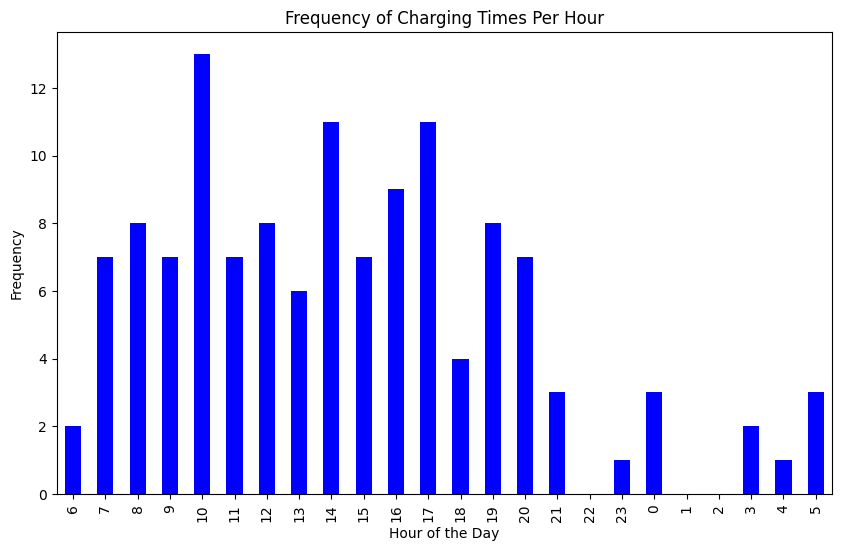

In [93]:
import matplotlib.pyplot as plt

# Convert 'Start Date' to datetime if it is not already
data_cleaned['Start Date'] = pd.to_datetime(data_cleaned['Start Date'])

# Create a new column "Start Date Year" that contains only the date part of 'Start Date'
data_cleaned['Start Date Year'] = data_cleaned['Start Date'].dt.date
data_cleaned['Start Date Time'] = data_cleaned['Start Date'].dt.time
data_cleaned['End Date Time'] = data_cleaned['End Date'].dt.time

# Filter the data from 6am on the 1st until 5am on the 2nd
data_filtered = data_cleaned[((data_cleaned['Start Date Year'] == pd.to_datetime('2016-10-09').date()) & (data_cleaned['Start Date Time'].apply(lambda x: x.hour) >= 6)) | 
                             ((data_cleaned['Start Date Year'] == pd.to_datetime('2016-10-10').date()) & (data_cleaned['Start Date Time'].apply(lambda x: x.hour) < 6))]

# Extract the hour from 'Start Date Time' and 'End Date Time'
data_filtered['Start Hour'] = data_filtered['Start Date Time'].apply(lambda x: x.hour)
data_filtered['End Hour'] = data_filtered['End Date Time'].apply(lambda x: x.hour)

# Calculate the frequency of each hour
hour_frequency = data_filtered['Start Hour'].value_counts().sort_index()

# Reorder the hour_frequency Series to start from 6 in the morning until 5 am next day
hour_frequency = hour_frequency.reindex(list(range(6,24)) + list(range(0,6)))

# Create a bar chart of the hour frequencies
plt.figure(figsize=(10, 6))
hour_frequency.plot.bar(color='blue')

plt.title('Frequency of Charging Times Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

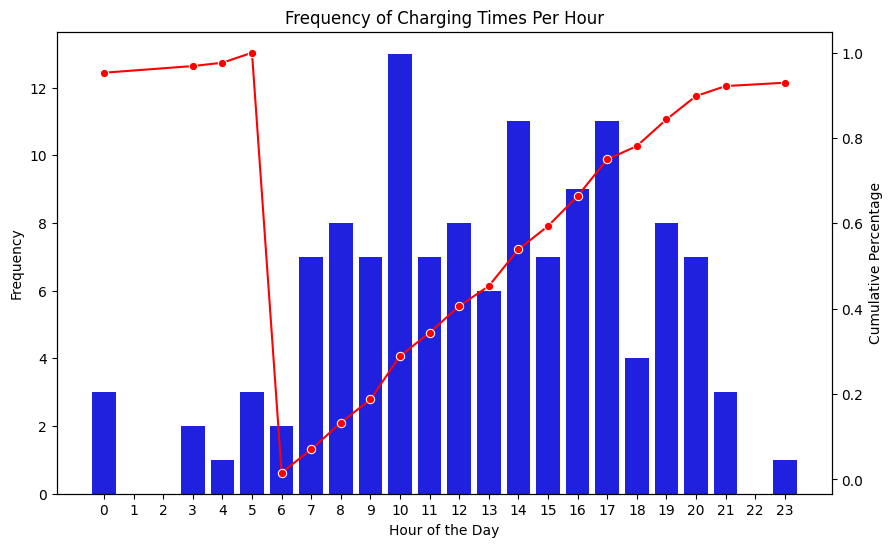

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Start Date' to datetime if it is not already
data_cleaned['Start Date'] = pd.to_datetime(data_cleaned['Start Date'])

# Create a new column "Start Date Year" that contains only the date part of 'Start Date'
data_cleaned['Start Date Year'] = data_cleaned['Start Date'].dt.date
data_cleaned['Start Date Time'] = data_cleaned['Start Date'].dt.time
data_cleaned['End Date Time'] = data_cleaned['End Date'].dt.time

# Filter the data from 6am on the 1st until 5am on the 2nd
data_filtered = data_cleaned[((data_cleaned['Start Date Year'] == pd.to_datetime('2016-10-09').date()) & (data_cleaned['Start Date Time'].apply(lambda x: x.hour) >= 6)) | 
                             ((data_cleaned['Start Date Year'] == pd.to_datetime('2016-10-10').date()) & (data_cleaned['Start Date Time'].apply(lambda x: x.hour) < 6))]

# Extract the hour from 'Start Date Time' and 'End Date Time'
data_filtered['Start Hour'] = data_filtered['Start Date Time'].apply(lambda x: x.hour)
data_filtered['End Hour'] = data_filtered['End Date Time'].apply(lambda x: x.hour)

# Calculate the frequency of each hour
hour_frequency = data_filtered['Start Hour'].value_counts().sort_index()

# Reorder the hour_frequency Series to start from 6 in the morning until 5 am next day
hour_frequency = hour_frequency.reindex(list(range(6,24)) + list(range(0,6)))

# Calculate the cumulative percentage
cumulative_percentage = hour_frequency.cumsum() / hour_frequency.sum()

# Create a bar chart of the hour frequencies
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=hour_frequency.index, y=hour_frequency.values, color='blue', ax=ax1)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
sns.lineplot(x=cumulative_percentage.index, y=cumulative_percentage.values, color='red', marker='o', ax=ax2)

ax1.set_title('Frequency of Charging Times Per Hour')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Cumulative Percentage')
plt.show()

In [77]:
print(((data_cleaned['Start Date Year'] == pd.to_datetime('2016-08-02').date()) & (data_cleaned['Start Date Time'].apply(lambda x: x.hour) < 6)).sum())

5


In [82]:
print(data_cleaned[data_cleaned['Start Date Year'] == pd.to_datetime('2016-08-03').date()])

                       Station Name          MAC Address            Org Name  \
279           PALO ALTO CA / MPL #6  000D:6F00:015B:7509  City of Palo Alto    
280      PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto    
281  PALO ALTO CA / TED THOMPSON #1  0024:B100:0002:1323  City of Palo Alto    
282     PALO ALTO CA / CAMBRIDGE #1  0024:B100:0002:1329  City of Palo Alto    
283      PALO ALTO CA / HAMILTON #2  0024:B100:0002:1331  City of Palo Alto    
..                              ...                  ...                 ...   
419      PALO ALTO CA / HAMILTON #2  0024:B100:0002:1331  City of Palo Alto    
420        PALO ALTO CA / BRYANT #2  000D:6F00:009D:CFC3  City of Palo Alto    
421  PALO ALTO CA / RINCONADA LIB 3  000D:6F00:015A:96E4  City of Palo Alto    
422      PALO ALTO CA / HAMILTON #2  0024:B100:0002:1331  City of Palo Alto    
423  PALO ALTO CA / RINCONADA LIB 2  000D:6F00:009E:D727  City of Palo Alto    

             Start Date Start Time Zone

In [84]:
print(data_cleaned[(data_cleaned['Start Date Year'] == pd.to_datetime('2016-08-03').date()) & (data_cleaned['Start Date Time'].apply(lambda x: x.hour) < 6)])

                       Station Name          MAC Address            Org Name  \
279           PALO ALTO CA / MPL #6  000D:6F00:015B:7509  City of Palo Alto    
280      PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto    
281  PALO ALTO CA / TED THOMPSON #1  0024:B100:0002:1323  City of Palo Alto    
282     PALO ALTO CA / CAMBRIDGE #1  0024:B100:0002:1329  City of Palo Alto    

             Start Date Start Time Zone            End Date End Time Zone  \
279 2016-08-03 00:20:00             PDT 2016-08-03 00:30:00           PDT   
280 2016-08-03 00:52:00             PDT 2016-08-03 08:38:00           PDT   
281 2016-08-03 04:17:00             PDT 2016-08-03 07:59:00           PDT   
282 2016-08-03 05:18:00             PDT 2016-08-03 06:54:00           PDT   

    Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
279             2016-08-03 00:30:00           0 days 00:10:43   
280             2016-08-03 08:38:00           0 days 07:45:55   
281             20

In [90]:
filtered_data = data_cleaned[data_cleaned['Start Date Time'].apply(lambda x: x.hour) < 5]
grouped_data = filtered_data.groupby('Start Date Year')
large_groups = grouped_data.filter(lambda x: len(x) > 5)
print(large_groups['Start Date Year'].unique())

[datetime.date(2016, 10, 10) datetime.date(2017, 1, 14)
 datetime.date(2017, 12, 14)]


Index([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        0,  1,  2,  3,  4,  5],
      dtype='int64', name='Start Hour')


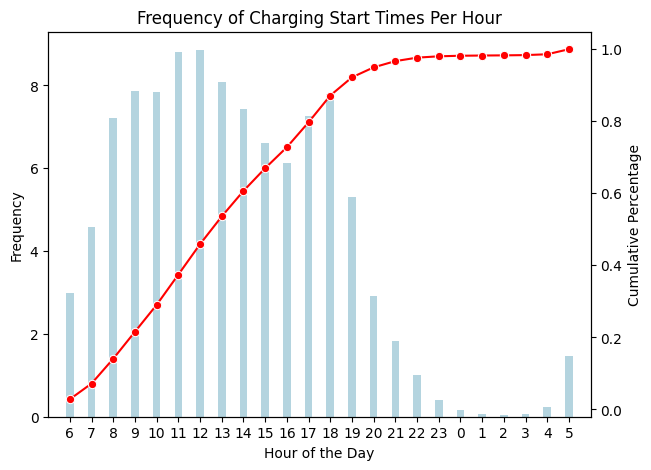

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Start Date' to datetime if it is not already
data_cleaned['Start Date'] = pd.to_datetime(data_cleaned['Start Date'])

# Create a new column "Start Date Year" that contains only the date part of 'Start Date'
data_cleaned['Start Date Year'] = data_cleaned['Start Date'].dt.date
data_cleaned['Start Date Time'] = data_cleaned['Start Date'].dt.time
data_cleaned['End Date Time'] = data_cleaned['End Date'].dt.time


data_cleaned['Start Hour'] = data_cleaned['Start Date'].dt.hour
data_filtered = data_cleaned[((data_cleaned['Start Hour'] >= 6)) | 
                             ((data_cleaned['Start Hour'] < 6))]

# Group by 'Start Hour' and calculate the average frequency for each hour
hour_frequency = data_filtered.groupby('Start Hour').size().div(len(data_cleaned['Start Date'].dt.date.unique()))

#
# Reorder the hour_frequency Series to start from 6 in the morning until 5 am next day
hour_frequency = hour_frequency.reindex(list(range(6,24)) + list(range(0,6)), fill_value=0)

# Calculate the cumulative percentage
cumulative_percentage = hour_frequency.cumsum() / hour_frequency.sum()

#print(cumulative_percentage)
#print(hour_frequency)

# Create a bar chart of the hour frequencies
fig, ax1 = plt.subplots(figsize=(7,5))
sns.barplot(x=hour_frequency.index.astype(str), y=hour_frequency.values, color='lightblue', ax=ax1, width=0.35)
print(hour_frequency.index)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
sns.lineplot(x=cumulative_percentage.index.astype(str), y=cumulative_percentage.values, color='red', marker='o', ax=ax2)

ax1.set_title('Frequency of Charging Start Times Per Hour')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Cumulative Percentage')

# Set the x-axis limits
ax1.set_xlim(-1, 24)
# Tilt the x-axis bar ticks
plt.xticks(rotation=45, ha='right')

plt.show()

In [146]:
data_cleaned

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Charging Time (minutes),Hour,Month,Year,Day,Start Date Year,Start Date Time,End Date Time,Start Hour,End Hour
0,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 05:21:00,PDT,2016-08-01 06:49:00,PDT,2016-08-01 06:49:00,0 days 01:27:58,0 days 01:25:26,...,85.433333,5,8,2016,1,2016-08-01,05:21:00,06:49:00,5,6.0
1,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,2016-08-01 06:01:00,PDT,2016-08-01 10:58:00,PDT,2016-08-01 10:58:00,0 days 04:56:27,0 days 02:31:04,...,151.066667,6,8,2016,1,2016-08-01,06:01:00,10:58:00,6,10.0
2,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 06:03:00,PDT,2016-08-01 09:15:00,PDT,2016-08-01 09:15:00,0 days 03:12:17,0 days 03:11:18,...,191.300000,6,8,2016,1,2016-08-01,06:03:00,09:15:00,6,9.0
3,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,2016-08-01 06:10:00,PDT,2016-08-01 08:54:00,PDT,2016-08-01 08:54:00,0 days 02:44:25,0 days 02:25:49,...,145.816667,6,8,2016,1,2016-08-01,06:10:00,08:54:00,6,8.0
4,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,2016-08-01 06:13:00,PDT,2016-08-01 09:33:00,PDT,2016-08-01 09:33:00,0 days 03:19:24,0 days 03:19:15,...,199.250000,6,8,2016,1,2016-08-01,06:13:00,09:33:00,6,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169438,PALO ALTO CA / CAMBRIDGE #5,0024:B100:0002:9B7F,City of Palo Alto,2020-12-31 15:51:00,PST,2020-12-31 17:30:00,PST,2020-12-31 17:31:00,0 days 01:38:27,0 days 01:21:36,...,81.600000,15,12,2020,31,2020-12-31,15:51:00,17:30:00,15,17.0
169439,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,2020-12-31 20:32:00,0 days 03:43:01,0 days 02:14:04,...,134.066667,16,12,2020,31,2020-12-31,16:48:00,20:31:00,16,20.0
169440,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,2021-01-01 10:57:00,0 days 17:28:14,0 days 05:08:12,...,308.200000,17,12,2020,31,2020-12-31,17:28:00,10:56:00,17,10.0
169441,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 17:49:00,PST,2020-12-31 21:55:00,PST,2020-12-31 21:56:00,0 days 04:05:34,0 days 03:53:42,...,233.700000,17,12,2020,31,2020-12-31,17:49:00,21:55:00,17,21.0


Index([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        0,  1,  2,  3,  4,  5],
      dtype='int64', name='End Hour')


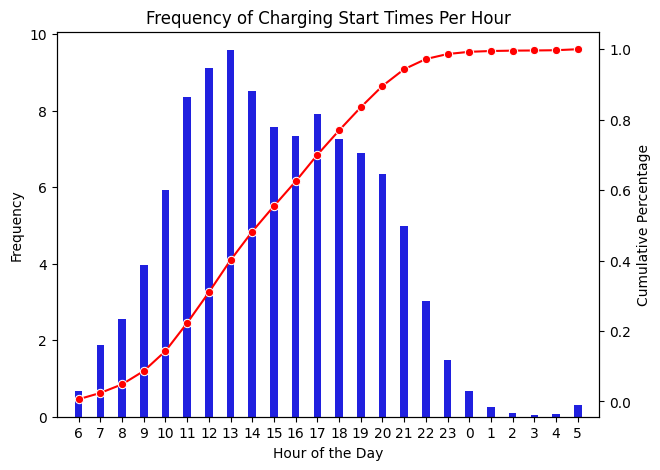

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns



data_filtered = data_cleaned[((data_cleaned['End Hour'] >= 6)) | 
                             ((data_cleaned['End Hour'] < 6))]

# Group by 'Start Hour' and calculate the average frequency for each hour
hour_frequency = data_filtered.groupby('End Hour').size().div(len(data_cleaned['End Date'].dt.date.unique()))

#
# Reorder the hour_frequency Series to start from 6 in the morning until 5 am next day
hour_frequency = hour_frequency.reindex(list(range(6,24)) + list(range(0,6)), fill_value=0)

# Calculate the cumulative percentage
cumulative_percentage = hour_frequency.cumsum() / hour_frequency.sum()

#print(cumulative_percentage)
#print(hour_frequency)

# Create a bar chart of the hour frequencies
fig, ax1 = plt.subplots(figsize=(7,5))
sns.barplot(x=hour_frequency.index.astype(str), y=hour_frequency.values, color='blue', ax=ax1, width=0.35)
print(hour_frequency.index)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
sns.lineplot(x=cumulative_percentage.index.astype(str), y=cumulative_percentage.values, color='red', marker='o', ax=ax2)

ax1.set_title('Frequency of Charging Start Times Per Hour')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Cumulative Percentage')

# Set the x-axis limits
ax1.set_xlim(-1, 24)
# Tilt the x-axis bar ticks
plt.xticks(rotation=45, ha='right')

plt.show()